# AVALUACIÓN CON TEXTO REAL

In [1]:
## ANALISIS EXPLORATORIO DE DATOS
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Funciones import *

In [2]:
from datasets import load_dataset

# Puedes cambiar "es" por "en", "fr", etc.
dataset = load_dataset("wikiann", "es")

In [3]:
print(dataset["test"])


Dataset({
    features: ['tokens', 'ner_tags', 'langs', 'spans'],
    num_rows: 10000
})


In [4]:
# Extract tokens and NER tags from the dataset
def extract_tokens_and_tags(dataset_split):
    all_examples = []
    
    # Process each example in the dataset
    for example in dataset_split:
        tokens = example["tokens"]
        ner_tags = example["ner_tags"]
        
        # Convert numeric tags to string format if needed
        if isinstance(ner_tags[0], int):
            # WikiAnn uses these tag IDs: O=0, B-PER=1, I-PER=2, B-ORG=3, I-ORG=4, B-LOC=5, I-LOC=6
            tag_map = {
                0: "O", 
                1: "B-PER", 2: "I-PER",
                3: "B-ORG", 4: "I-ORG",
                5: "B-LOC", 6: "I-LOC"
            }
            ner_tags = [tag_map[tag] for tag in ner_tags]
        
        # Create list of (token, tag) pairs for this example
        example_pairs = [(tokens[i], ner_tags[i]) for i in range(len(tokens))]
        all_examples.append(example_pairs)
    
    return all_examples

# Extract examples from each split
test_examples = extract_tokens_and_tags(dataset["test"])

print(f"Number of examples in test: {len(test_examples)}")

# Print a sample from the test set
print("\nSample examples from test set:")
for i in range(min(3, len(test_examples))):
    print(f"Example {i+1}: {test_examples[i]}")

Number of examples in test: 10000

Sample examples from test set:
Example 1: [('Jilguero', 'B-PER'), ('del', 'I-PER'), ('Huascarán', 'I-PER')]
Example 2: [('REDIRECCIÓN', 'O'), ('Sancho', 'B-PER'), ('I', 'I-PER'), ('de', 'I-PER'), ('Cerdaña', 'I-PER')]
Example 3: [('Lyme', 'B-LOC'), ('(', 'O'), ('pueblo', 'O'), (')', 'O')]


Loading pre-trained model from Modelos_Spanish/best_model_r1_B.crf.tagger...
Evaluating model on test data...

=== Entity-Level Evaluation Results ===
Precision: 0.0408
Recall: 0.0509
F1 Score: 0.0453

=== Entity-Level Confusion Matrix ===


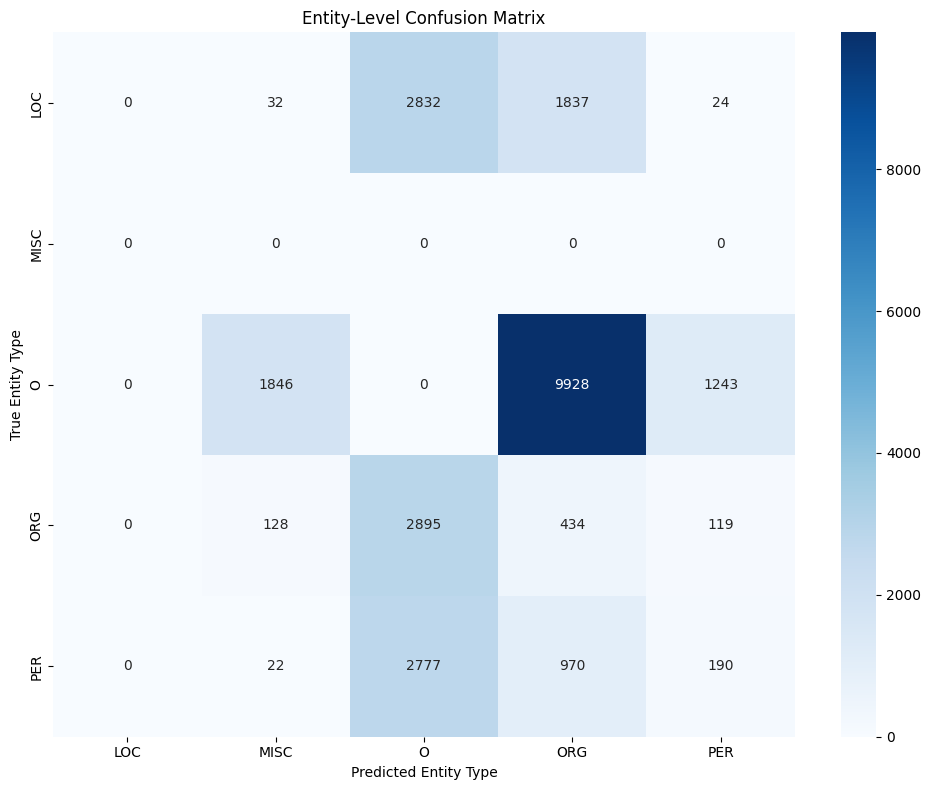


Most common entity type confusions:
  O mistaken as ORG: 9928 times
  ORG mistaken as O: 2895 times
  LOC mistaken as O: 2832 times
  PER mistaken as O: 2777 times
  O mistaken as MISC: 1846 times


In [5]:
model_path = 'Modelos_Spanish/best_model_r1_B.crf.tagger'

results = run_optimal_configuration(model_path=model_path, preprocessed_test=test_examples)
